In [ ]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Data Pre Processing
data1 = pd.read_csv("/content/Sensor.csv",index_col=-1)
data2 = pd.read_csv("/content/Sensor_high_freq.csv",index_col = 0)

data1.drop(['Period Code','Cycle ID'],axis=1,inplace=True)
new_data2 = data2.drop(['Percent'],axis=1)
comb_data = data1.merge(new_data2,left_on='timestamp', right_on='timestamp')
comb_data = comb_data[[c for c in comb_data if c != 'Good/Bad'] + ['Good/Bad']]

cols = comb_data.columns
for col in cols:
  comb_data[col] = pd.to_numeric(comb_data[col],errors='coerce')

print("Amount of Missing info in each column:")
print(comb_data.isnull().sum())

Amount of Missing info in each column:
B_2         392
B_3         396
B_4         396
B_5         402
B_9         392
B_10        395
B_14        402
B_15        399
B_16        389
B_17        403
B_18        393
B_19        399
B_20        394
B_21        394
B_22        389
B_23        402
B_24        394
B_25        392
B_6          70
B_7          80
B_8          71
B_11         68
B_12         75
B_13         81
Good/Bad    394
dtype: int64


In [ ]:
print("Amount of Missing info in each column after filling them up with means and removing rows with no labels:")
comb_data = comb_data.fillna(comb_data.mean())
comb_data.drop(comb_data[(comb_data['Good/Bad'] != 0) & (comb_data['Good/Bad'] != 1)].index, inplace = True)
print(comb_data.isnull().sum())

Amount of Missing info in each column after filling them up with means and removing rows with no labels:
B_2         0
B_3         0
B_4         0
B_5         0
B_9         0
B_10        0
B_14        0
B_15        0
B_16        0
B_17        0
B_18        0
B_19        0
B_20        0
B_21        0
B_22        0
B_23        0
B_24        0
B_25        0
B_6         0
B_7         0
B_8         0
B_11        0
B_12        0
B_13        0
Good/Bad    0
dtype: int64


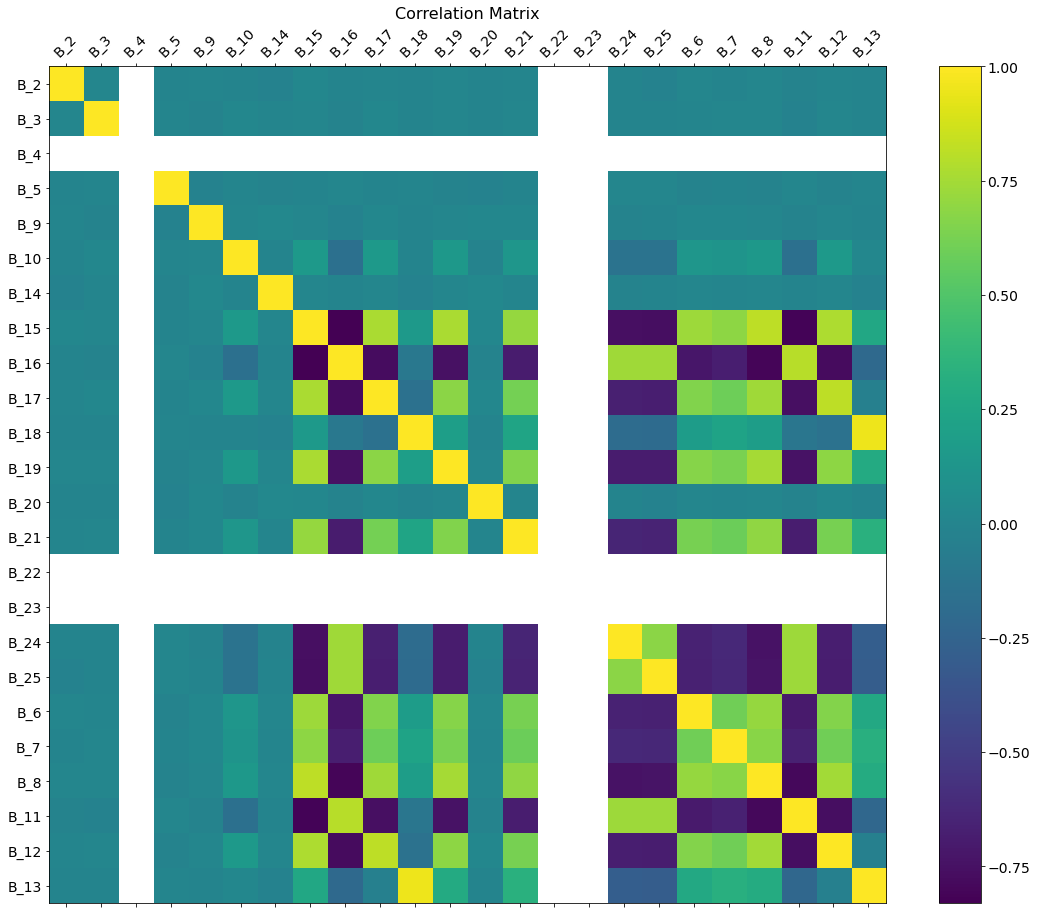

In [ ]:
plt_data = comb_data.drop(['Good/Bad'],axis=1)
f = plt.figure(figsize=(19, 15))
plt.matshow(plt_data.corr(), fignum=f.number)
plt.xticks(range(plt_data.select_dtypes(['number']).shape[1]), plt_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(plt_data.select_dtypes(['number']).shape[1]), plt_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Hence we are going to use all the columns, as there isn't much correlation between attributes 

In [ ]:
# function to read data, preprocess it and return dataset used for classifcation

def data_preprocessing(addr1,addr2,addr3):
  data1 = pd.read_csv(addr1,index_col=-1)
  data2 = pd.read_csv(addr2,index_col = 0)
  data3 = pd.read_csv(addr3)

  data1.drop(['Period Code','Cycle ID'],axis=1,inplace=True)
  new_data2 = data2.drop(['Percent'],axis=1)
  comb_data = data1.merge(new_data2,left_on='timestamp', right_on='timestamp')
  comb_data = comb_data[[c for c in comb_data if c != 'Good/Bad'] + ['Good/Bad']]

  cols = comb_data.columns
  for col in cols:
    comb_data[col] = pd.to_numeric(comb_data[col],errors='coerce')
  comb_data = comb_data.fillna(comb_data.mean())
  comb_data.drop(comb_data[(comb_data['Good/Bad'] != 0) & (comb_data['Good/Bad'] != 1)].index, inplace = True)

  return comb_data

In [ ]:
class classify:
  def __init__(self,comb_data):
    X_data = comb_data.iloc[:, :-1].values
    Y_data = comb_data.iloc[:, -1].values
    X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data, test_size=0.2)
    self.X_data = X_data
    self.Y_data = Y_data
    self.X_train = X_train
    self.Y_train = Y_train
    self.X_test = X_test
    self.Y_test = Y_test

    # Building a simple Support Vector Machine on the data
    Support_vector_machine_model = SVC(kernel='linear') 
    Support_vector_machine_model.fit(X_train,Y_train)
    self.Support_vector_machine_model = Support_vector_machine_model
    y_train_predict = Support_vector_machine_model.predict(X_train)
    y_test_predict = Support_vector_machine_model.predict(X_test)

    from sklearn.metrics import accuracy_score
    print(f'Training accuracy score - Support_vector_machine_model :{accuracy_score(y_train_predict, Y_train)}')
    print(f'Test accuracy score - Support_vector_machine_model :{accuracy_score(y_test_predict, Y_test)}')

    # Building Decison Tree Classifier using 5-fold cross validation
    decision_tree_model = DecisionTreeClassifier(criterion="entropy",random_state=0)
    self.decision_tree_model = decision_tree_model
    decision_tree_model.fit(X_train, Y_train)
    y_train_predict = decision_tree_model.predict(X_train)
    y_test_predict = decision_tree_model.predict(X_test)

    print(f'Training accuracy score - decision_tree_model :{accuracy_score(y_train_predict, Y_train)}')
    print(f'Test accuracy score - decision_tree_model :{accuracy_score(y_test_predict, Y_test)}')

    # Buidling Adaptive Boosting Model which is an ensemble learning method
    AdaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=0)
    AdaBoost_model.fit(X_train,Y_train)
    self.AdaBoost_model = AdaBoost_model
    y_train_predict = AdaBoost_model.predict(X_train)
    y_test_predict = AdaBoost_model.predict(X_test)

    print(f'Training accuracy score - AdaBoost_model :{accuracy_score(y_train_predict, Y_train)}')
    print(f'Test accuracy score - AdaBoost_model :{accuracy_score(y_test_predict, Y_test)}')

  def get_SVC_Score(self,data=None):
    if data is None:
      return(self.Support_vector_machine_model.score(self.X_test,self.Y_test))
    else:
      X = data.iloc[:, :-1].values
      Y = data.iloc[:, -1].values
      return(self.Support_vector_machine_model.score(X,Y))
  
  def get_Decision_Tree_Score(self,data=None):
    if data is None:
      decision_tree_result = cross_validate(estimator=self.decision_tree_model, X = self.X_data, 
                                      y = self.Y_data, cv=5, scoring='accuracy',
                                      return_train_score=True)
      return(decision_tree_result['test_score'].mean())
    else:
      _X = data.iloc[:, :-1].values
      _Y = data.iloc[:, -1].values
      decision_tree_result = cross_validate(estimator=self.decision_tree_model, X = _X, 
                                      y = _Y, cv=5, scoring='accuracy',
                                      return_train_score=True)
      return(decision_tree_result['test_score'].mean())
  
  def get_AdaBoost_Score(self,data=None):
    if data is None:
      return(self.AdaBoost_model.score(self.X_test,self.Y_test))
    else:
      X = data.iloc[:, :-1].values
      Y = data.iloc[:, -1].values
      return(self.AdaBoost_model.score(X,Y))

  def disp_conf_mat_AdaBoost(self,data=None):
    if data is None:
      disp = ConfusionMatrixDisplay.from_estimator(
        self.AdaBoost_model,
        self.X_test,
        self.Y_test,
        display_labels=['Good','Bad'],
        cmap=plt.cm.Blues)
    else:
      X = data.iloc[:, :-1].values
      Y = data.iloc[:, -1].values
      disp = ConfusionMatrixDisplay.from_estimator(
        self.AdaBoost_model,
        X,Y,display_labels=['Good','Bad'],
        cmap=plt.cm.Blues)
    disp.ax_.set_title("Confusion Matrix for Adaptive Boosting")
    return disp

  def disp_roc_curve_AdaBoost(self,data=None):
    if data is None:
      disp = RocCurveDisplay.from_estimator(
        self.AdaBoost_model,
        self.X_test,
        self.Y_test)
    disp.ax_.set_title("ROC Curve for Adaptive Boosting")
    return disp

  

In [ ]:
data = data_preprocessing("/content/Sensor.csv","/content/Sensor_high_freq.csv"
                              ,"/content/Percent_reference.csv")

classifiers = classify(data)
Score1 = classifiers.get_SVC_Score()
Score2 = classifiers.get_Decision_Tree_Score()
Score3 = classifiers.get_AdaBoost_Score()

print("Classificaton Accuracy of Support Vector Machine: ",Score1)
print("Classificaton Accuracy of Decision Tree Classifer: ",Score2)
print("Classificaton Accuracy of Adaptive Boosting: ",Score3)

Training accuracy score - Support_vector_machine_model :0.9525074110671937
Test accuracy score - Support_vector_machine_model :0.9538043478260869
Training accuracy score - decision_tree_model :1.0
Test accuracy score - decision_tree_model :0.946393280632411
Training accuracy score - AdaBoost_model :0.9643033596837944
Test accuracy score - AdaBoost_model :0.9580039525691699
Classificaton Accuracy of Support Vector Machine:  0.9538043478260869
Classificaton Accuracy of Decision Tree Classifer:  0.9365612648221344
Classificaton Accuracy of Adaptive Boosting:  0.9580039525691699


Displaying Confusion Matrix and ROC curve for our best model i.e. Adaptive Boosting

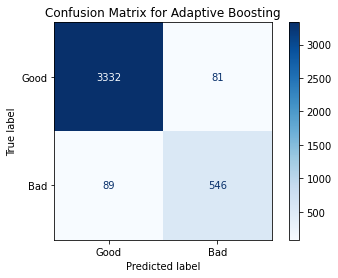

In [ ]:
disp = classifiers.disp_conf_mat_AdaBoost()
plt.show()

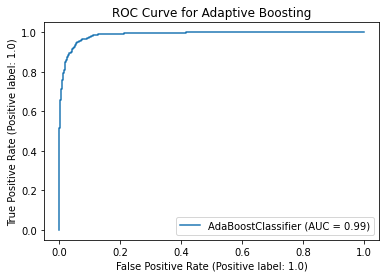

In [ ]:
disp = classifiers.disp_roc_curve_AdaBoost()
plt.show()